# **Import from Libraries**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# **Trained convolutional neural network loading (VGG19)**

In [2]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

2021-12-10 20:37:12.745450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 20:37:12.834791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 20:37:12.835494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 20:37:12.836613: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step


In [3]:
network.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

# **Image loading and Processing**

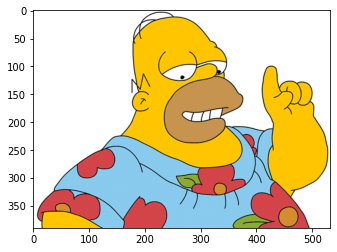

In [4]:
image_content = tf.keras.preprocessing.image.load_img('../input/neural-networks-homer-and-bart-classification/homer_bart_1/homer93.bmp')
plt.imshow(image_content);

In [5]:
image_content = tf.keras.preprocessing.image.img_to_array(image_content)

In [6]:
image_content.shape

(390, 533, 3)

In [7]:
image_content.min(), image_content.max()

(0.0, 255.0)

In [8]:
image_content = image_content / 255

In [9]:
image_content.min(), image_content.max()

(0.0, 1.0)

In [10]:
image_content

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [11]:
image_content = image_content[tf.newaxis, :]  
image_content.shape 

(1, 390, 533, 3)

# **Style Image**

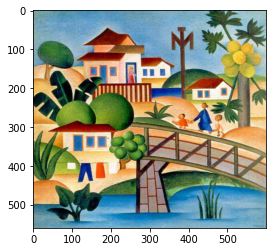

In [12]:
image_style = tf.keras.preprocessing.image.load_img('../input/styleimage/tarsila_amaral.jpg')
plt.imshow(image_style);

In [13]:
image_style = tf.keras.preprocessing.image.img_to_array(image_style)
image_style = image_style / 255
image_style = image_style[tf.newaxis, :]
image_style.shape

(1, 560, 600, 3)

In [14]:
#image_style = tf.keras.preprocessing.image.load_img('../input/styleimage/vangogh.jpg')
#plt.imshow(image_style);

In [15]:
#image_style = tf.keras.preprocessing.image.img_to_array(image_style)
#image_style = image_style / 255
#image_style = image_style[tf.newaxis, :]
#image_style.shape

# **Construction of the neural network**

In [16]:
layers_content = ['block4_conv2']  
layers_style = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [17]:
number_layers_content = len(layers_content)
number_layers_style = len(layers_style)
print(number_layers_content, number_layers_style)

1 5


In [18]:
network.get_layer('block1_conv1').output

<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>

In [19]:
network.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [20]:
for name in layers_style:
  print(name)

block1_conv1
block2_conv1
block3_conv1
block4_conv1
block5_conv1


In [21]:
def vgg_layers(layer_name):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(name).output for name in layer_name]
  network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)
  return network

In [22]:
style_extractor = vgg_layers(layers_style)

In [23]:
style_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [24]:
style_extractor.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [25]:
style_outputs = style_extractor(image_style)

2021-12-10 20:37:20.300420: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [26]:
len(style_outputs)

5

In [27]:
style_outputs[0].shape, style_outputs[1].shape, style_outputs[2].shape, style_outputs[3].shape, style_outputs[4].shape,  

(TensorShape([1, 560, 600, 64]),
 TensorShape([1, 280, 300, 128]),
 TensorShape([1, 140, 150, 256]),
 TensorShape([1, 70, 75, 512]),
 TensorShape([1, 35, 37, 512]))

In [28]:
def gram_matrix(activations):
  result = tf.linalg.einsum('bijc,bijd->bcd', activations, activations)
  input_shape = tf.shape(activations)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
  return result / num_locations

In [29]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.631103  , 0.28949898, 0.28517228, ..., 0.1051826 ,
         0.36955735, 0.45017177],
        [0.28949898, 0.24226907, 0.18415499, ..., 0.03151667,
         0.19604628, 0.2170014 ],
        [0.28517228, 0.18415499, 0.16761073, ..., 0.02775798,
         0.19407691, 0.22697577],
        ...,
        [0.1051826 , 0.03151667, 0.02775798, ..., 0.08261998,
         0.06934635, 0.06634998],
        [0.36955735, 0.19604628, 0.19407691, ..., 0.06934635,
         0.28692862, 0.3186243 ],
        [0.45017177, 0.2170014 , 0.22697577, ..., 0.06634998,
         0.3186243 , 0.37485763]]], dtype=float32)>

In [30]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, layers_style, layers_content):
    super().__init__()
    self.vgg = vgg_layers(layers_style + layers_content)
    self.layers_style = layers_style
    self.layers_content = layers_content
    self.number_layers_style = len(layers_style)
    self.vgg.trainable = False

  def call(self, image):
    image = image * 255.0

    preprocessed_image = tf.keras.applications.vgg19.preprocess_input(image)
    outputs = self.vgg(preprocessed_image)
    style_outputs = outputs[:self.number_layers_style] 
    content_outputs = outputs[self.number_layers_style:] 

    style_outputs = [gram_matrix(layer) for layer in style_outputs]

    content_dict = {content_name: value for content_name, value in zip(self.layers_content, content_outputs)}
    dict_style = {style_name: value for style_name, value in zip(self.layers_style, style_outputs)}

    return {'content': content_dict, 'style': dict_style}

In [31]:
layers_style, layers_content

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [32]:
extractor = StyleContentModel(layers_style, layers_content)

In [33]:
results = extractor(image_content)

In [34]:
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 48, 66, 512), dtype=float32, numpy=
  array([[[[0.0000000e+00, 0.0000000e+00, 5.1567017e+01, ...,
            0.0000000e+00, 3.3436603e+02, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 2.2315662e+02, ...,
            0.0000000e+00, 2.6416296e+02, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 2.6913428e+02, ...,
            0.0000000e+00, 4.2554477e+02, 0.0000000e+00],
           ...,
           [0.0000000e+00, 0.0000000e+00, 2.8290854e+02, ...,
            0.0000000e+00, 2.9532755e+02, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 6.5502991e+02, ...,
            0.0000000e+00, 2.1434773e+02, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 6.1436133e+02, ...,
            4.4078436e+00, 2.8995963e+02, 0.0000000e+00]],
  
          [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
            6.1324744e+02, 1.0979754e+02, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 2.4927774e+

In [35]:
for key, value in results.items():
  print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [36]:
goal_style = extractor(image_style)['style']
objective_content = extractor(image_content)['content']

In [37]:
len(goal_style), len(objective_content)

(5, 1)

In [38]:
new_image = tf.Variable(image_content)

In [39]:
weight_content = 1
weight_style = 1000 

In [40]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)

# **Training**

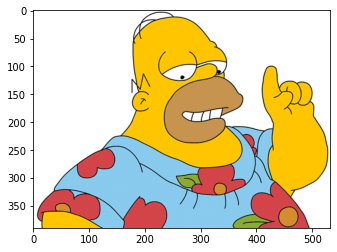

In [41]:
plt.imshow(tf.squeeze(image_content, axis=0));

Epoch:  500  Content loss:  tf.Tensor(884549.7, shape=(), dtype=float32)  Style loss:  tf.Tensor(367258050.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(73452495000.0, shape=(), dtype=float32)


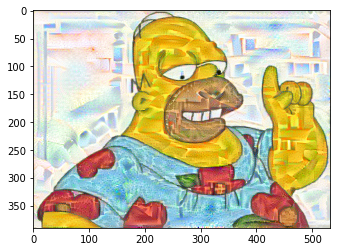

Epoch:  1000  Content loss:  tf.Tensor(931439.8, shape=(), dtype=float32)  Style loss:  tf.Tensor(236752880.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(47351505000.0, shape=(), dtype=float32)


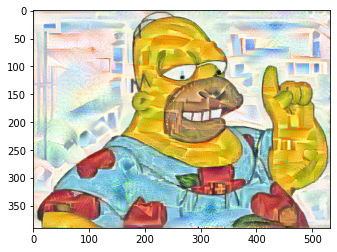

Epoch:  1500  Content loss:  tf.Tensor(920715.25, shape=(), dtype=float32)  Style loss:  tf.Tensor(253073920.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(50615706000.0, shape=(), dtype=float32)


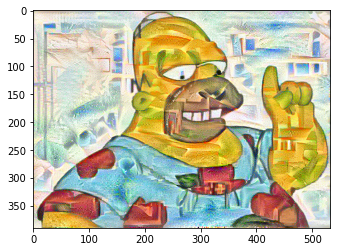

Epoch:  2000  Content loss:  tf.Tensor(968180.1, shape=(), dtype=float32)  Style loss:  tf.Tensor(119441624.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(23889293000.0, shape=(), dtype=float32)


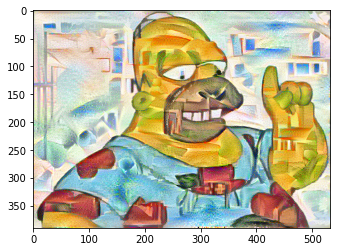

Epoch:  2500  Content loss:  tf.Tensor(989763.8, shape=(), dtype=float32)  Style loss:  tf.Tensor(95805890.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(19162167000.0, shape=(), dtype=float32)


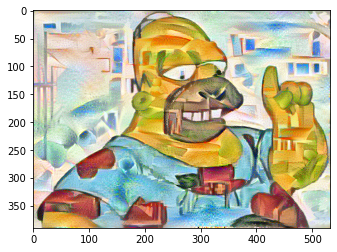

Epoch:  3000  Content loss:  tf.Tensor(996125.44, shape=(), dtype=float32)  Style loss:  tf.Tensor(88485150.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(17698025000.0, shape=(), dtype=float32)


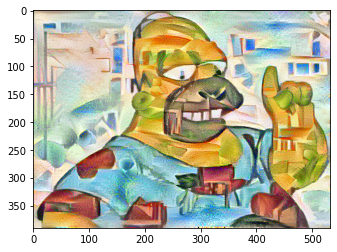

In [42]:
epochs = 3000
prints = 500

for epoch in range(epochs):
  with tf.GradientTape() as tape:    
    outputs = extractor(new_image)

    content_outputs = outputs['content']
    style_outputs = outputs['style']

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - objective_content[name]) ** 2) for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - goal_style[name]) ** 2) for name in style_outputs.keys()])
    total_loss = content_loss * weight_content / number_layers_content + style_loss * weight_style / number_layers_style

  gradiente = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradiente, new_image)])
  new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

  if (epoch + 1) % prints == 0:
    print('Epoch: ', epoch + 1, ' Content loss: ', content_loss, ' Style loss: ', style_loss, ' Total loss: ', total_loss)
    plt.imshow(tf.squeeze(new_image, axis=0));
    plt.show()

# **Visualization of results**

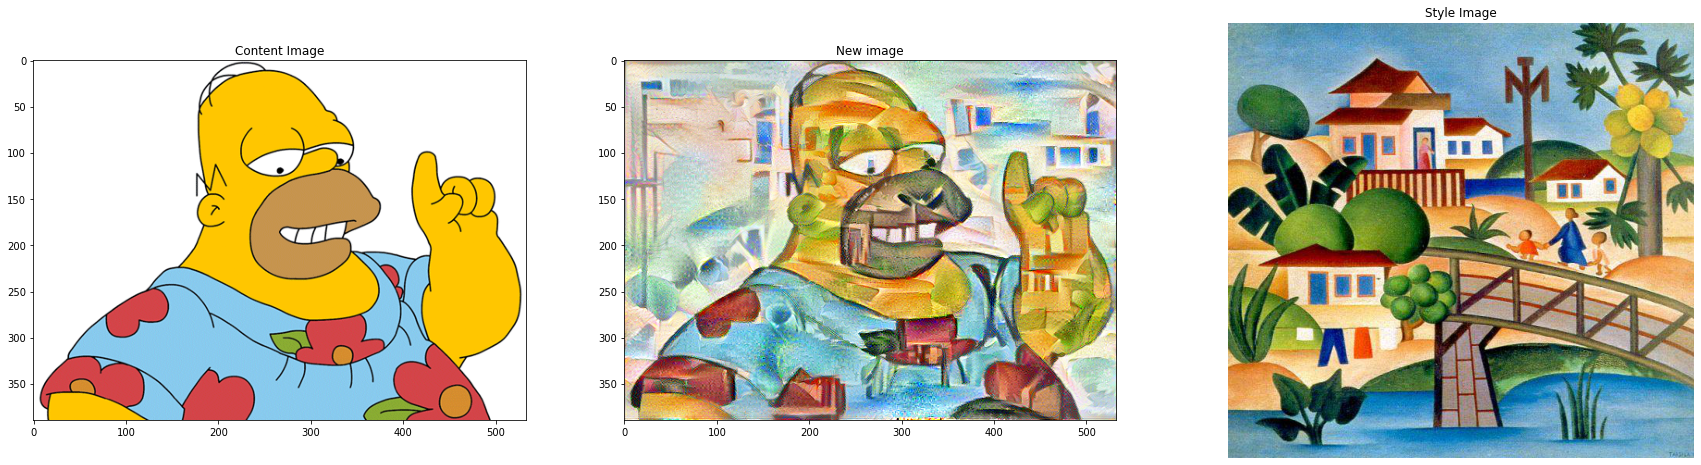

In [43]:
figure, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(30,8))
axis1.imshow(tf.squeeze(image_content, axis = 0))
axis1.set_title('Content Image')
plt.axis('off')
axis2.imshow(tf.squeeze(new_image, axis = 0))
axis2.set_title('New image')
plt.axis('off')
axis3.imshow(tf.squeeze(image_style, axis = 0))
axis3.set_title('Style Image')
plt.axis('off');

# **If you find this notebook useful, support with an upvote** 👍